In [131]:
#importation des librairies de manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score

In [132]:
# 1- Importation de la table des données dans l'environnement de travail
data = pd.read_csv("C:/Users/GSI/Desktop/mougnutou/datascience/cours_devoirs_datascience/semaine27/data_1.csv")

In [133]:
# Preuve de la réussite de l’importation.
data.head(4)

,ID,sex,age,ethnicity,height,fvc,fev,fef2575,fevfvc
0,1000948,1,4.95,1,109,1.230,1.12,1.39,0.91
1,500921,1,5.00,1,119,1.100,1.10,1.81,1.00
2,1000157,1,5.40,1,107,0.970,0.91,1.70,0.94
3,1000805,1,5.29,1,118,0.939,0.94,1.64,1.00


In [134]:
# 2- Sélection de la sous-base data_male
data_male = data.loc[data['sex'] == 1]
data_male = data.filter(["age", "height", "fev"])
data_male.head(3)

,age,height,fev
0,4.95,109,1.12
1,5.00,119,1.10
2,5.40,107,0.91


In [135]:
# 3- Descriptions numériques des trois variables de data_male 
data_male.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1777.0,28.334051,17.920546,4.45,13.02,24.457221,40.030116,88.131417
height,1777.0,158.232414,17.068275,103.00,151.00,162.000000,170.000000,196.000000
fev,1777.0,2.498509,0.897767,0.65,1.80,2.460000,3.110000,5.910000


### Rappellons tout dabord que la base data_male à trois variables significatives: age, height, fev et 842 individus. la variable sex pouvant être éliminé de la table.
### age est compris entre 4.95 et 87,15948 ans et la moyenne d'âge est de 28,243708 ans
### height va de 103 à 196 cm et la moyenne de la taille est de 161,933492 cm
### fev est compris entre 0.84 et 5,91 et la moyenne de la fev est 2.814228

<AxesSubplot:ylabel='Frequency'>

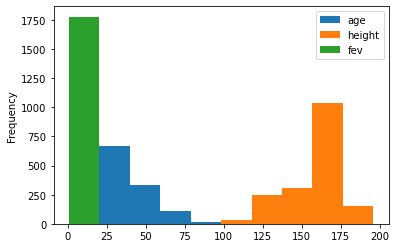

In [136]:
# Description graphique des variables
# visualisation sur 50 intervalles
data_male.plot.hist()

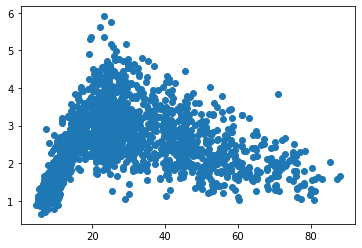

In [137]:
# 4- a. Description graphique de la relation entre fev (variable expliquée) et l’âge.
plt.scatter(data_male['age'], data_male['fev'])

### Le nuage des points provenant de cette association est trop dispersé donc il semble ne pas avoir une relation lineaire entre le fev et age.

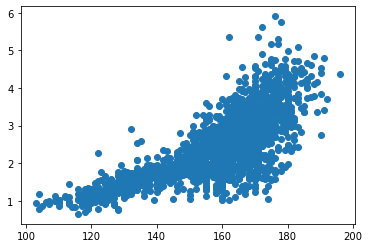

In [138]:
# 4- b. Description graphique de la relation entre fev (variable expliquée) et la taille.
plt.scatter(data_male['height'], data_male['fev'])

### Nous constatons que le nuage semble être disposé de facons lineaire dont nous pouvons à priori penser qu'il existe une correlation entre la taille et la fev.

## 6- Analyse prédictive.

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
def preprocessing(data_1):
    X = data_male.drop('fev', 'sex', axis=1)
    y = data_male['fev']
    print(y.value_counts())
    return X, y

In [141]:
X = data_male.drop('fev', axis = 1) # Features
y = data_male['fev']  # Target

In [142]:
# Fractionnement de la base des données en ensemble d'entraînement et de test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [143]:
data_male.head(5)

,age,height,fev
0,4.95,109,1.12
1,5.00,119,1.10
2,5.40,107,0.91
3,5.29,118,0.94
4,5.53,119,1.34


## 6-1 K Neighbors Regressor

In [144]:
# 6-1 K Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor

In [145]:
NR = KNeighborsRegressor()
NR.fit(X_train, y_train)

KNeighborsRegressor()

In [146]:
# Predire les valeurs cibles de l'ensemble de test
y_pred = NR.predict(X_test)

In [147]:
print(mean_squared_error(y_test, y_pred))

0.27044175280898874


### La puissance prédictive est de 0.28
### cherchons à optimiser le model

In [148]:
%matplotlib inline
import numpy.random as rnd
index = list(data_male.index)

In [149]:
## boucle sur un parametre
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
voisins = []
r2s = []
for n in range(1, 10):
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    r2 = r2_score(y_test, knn.predict(X_test))
    voisins.append(n)
    r2s.append(r2)

In [150]:
r2_score(y_train, NR.predict(X_train))

0.7787679175000227

In [151]:
r2_score(y_test, NR.predict(X_test))

0.652096677189238

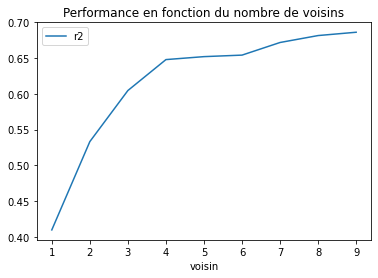

In [152]:
data_male = pd.DataFrame(dict(voisin=voisins, r2=r2s))
ax = data_male.plot(x='voisin', y='r2')
ax.set_title("Performance en fonction du nombre de voisins");

In [153]:
parameters = {'n_neighbors': list(range(1,31))}

In [154]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()
grid = GridSearchCV(knn, parameters, verbose=2, return_train_score=True)

In [155]:
grid.fit(X, y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................

[CV] END .....................................n_neighbors=23; total time=   0.0s
[CV] END .....................................n_neighbors=23; total time=   0.0s
[CV] END .....................................n_neighbors=23; total time=   0.0s
[CV] END .....................................n_neighbors=23; total time=   0.0s
[CV] END .....................................n_neighbors=23; total time=   0.0s
[CV] END .....................................n_neighbors=24; total time=   0.0s
[CV] END .....................................n_neighbors=24; total time=   0.0s
[CV] END .....................................n_neighbors=24; total time=   0.0s
[CV] END .....................................n_neighbors=24; total time=   0.0s
[CV] END .....................................n_neighbors=24; total time=   0.0s
[CV] END .....................................n_neighbors=25; total time=   0.0s
[CV] END .....................................n_neighbors=25; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             return_train_score=True, verbose=2)

C:\Users\GSI\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\GSI\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


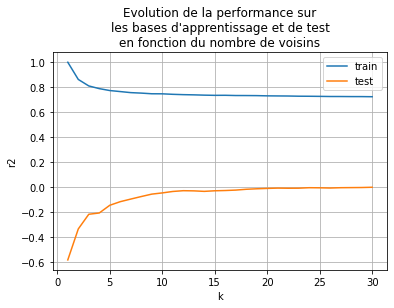

In [156]:
res = grid.cv_results_
k = res['param_n_neighbors']
train_score = res['mean_train_score']
test_score = res['mean_test_score']

import pandas
data_male_score = pd.DataFrame(dict(k=k, test=test_score, train=train_score))
ax = data_male_score.plot(x='k', y='train', figsize=(6, 4))
data_male_score.plot(x='k', y='test', ax=ax, grid=True)
ax.set_title("Evolution de la performance sur\nles bases d'apprentissage et de test" +
             "\nen fonction du nombre de voisins")
ax.set_ylabel("r2");

In [157]:
data_male_score[7:15]

,k,test,train
7,8,-0.076540,0.751922
8,9,-0.057190,0.746649
9,10,-0.047553,0.746218
10,11,-0.035943,0.742272
11,12,-0.029748,0.739591
12,13,-0.031076,0.737988
13,14,-0.035134,0.735582
14,15,-0.030444,0.734051


### Difficile de tirer une conclusion sur l'erreur sur la base d'apprentissage.

In [158]:
parameters = {'n_neighbors': list(range(5, 51, 5)) + list(range(50, 201, 20))}
grid = GridSearchCV(knn, parameters, verbose=2, return_train_score=True)
grid.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END .....................................n_neighbors=10; total time=   0.0s
[CV] END .....................................n_neighbors=10; total time=   0.0s
[CV] END .....................................n_neighbors=10; total time=   0.0s
[CV] END .....................................n_neighbors=10; total time=   0.0s
[CV] END .....................................n_neighbors=10; total time=   0.0s
[CV] END .....................................n_neighbors=15; total time=   0.0s
[CV] END .....................................n_

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                         50, 70, 90, 110, 130, 150, 170, 190]},
             return_train_score=True, verbose=2)

C:\Users\GSI\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\GSI\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


Text(0.5, 1.0, "Evolution de la performance sur\nles bases d'apprentissage et de test\nen fonction du nombre de voisins")

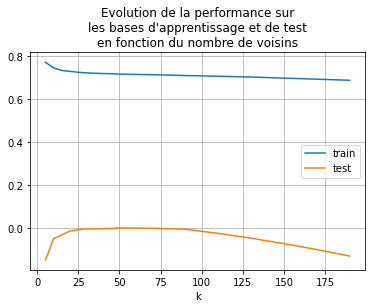

In [159]:
res = grid.cv_results_
k = res['param_n_neighbors']
train_score = res['mean_train_score']
test_score = res['mean_test_score']

import pandas
res = grid.cv_results_
k = res['param_n_neighbors']
train_score = res['mean_train_score']
test_score = res['mean_test_score']

import pandas
data_male_score = pd.DataFrame(dict(k=k, test=test_score, train=train_score))
ax = data_male_score.plot(x='k', y='train', figsize=(6, 4))
data_male_score.plot(x='k', y='test', ax=ax, grid=True)
ax.set_title("Evolution de la performance sur\nles bases d'apprentissage et de test" +
             "\nen fonction du nombre de voisins")

## 6-2 Gradient Boosting Regressor 

In [173]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [213]:
params = {
    "n_estimators": 600,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [214]:
gradientregressor = GradientBoostingRegressor(max_depth = 7, n_estimators = 30, learning_rate = 1.0)

In [215]:
GBR = gradientregressor.fit(X_train, y_train)

In [216]:
# Predicting the target values of the test set
y_pred = GBR.predict(X_test)

In [217]:
# Predicting the target values of the test set.
print(mean_squared_error(y_test, y_pred))

0.4679266456513239


In [218]:
r2_score(y_train, GBR.predict(X_train))

0.9948603352430617

In [205]:
r2_score(y_train, GBR.predict(X_train))

0.9932332519182338

In [206]:
r2_score(y_test, GBR.predict(X_test))

0.43012004656985314

### La puissance prédictive est 0.469

## 6-3 Random Forest Regressor. 

In [173]:
from sklearn.ensemble import RandomForestRegressor

In [174]:
# Initializing the Random Forest Regression model with 10 decision trees
RF = RandomForestRegressor(n_estimators = 2, random_state = 10)

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
r2_score(y_test, rf.predict(X_test))

0.6472975165053796

### La puissance prédictive est 0,647

## Nous allons comparer plusieurs modèles afin de sélectionner celui qui correspond le plus aux donées de data_male.

In [145]:
import warnings
warnings.simplefilter('ignore')

In [146]:
# Normalisons les données
from sklearn.preprocessing import normalize
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)
X_norm = normalize(X)

### # soulignons quand même que Cette façon de faire est complètement erronnée car il est peu probable que la même normalisation soit apppliquée sur toutes les bases. La normalisation doit être estimée sur la base d’apprentissage et appliquée sur la base de test. Reprenons.

In [147]:
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.neighbors import *
from sklearn.neural_network import *

models = [
    model for name, model in globals().items() if (
        hasattr(model, 'fit') and not hasattr(model, 'predict_proba') and
        hasattr(model, '__name__') and not model.__name__.endswith('CV') and
        'Logistic' not in model.__name__ and 'Regr' in model.__name__)]

import pprint
pprint.pprint(models)

[<class 'sklearn.tree._classes.DecisionTreeRegressor'>,
 <class 'sklearn.neighbors._regression.KNeighborsRegressor'>,
 <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>,
 <class 'sklearn.ensemble._forest.RandomForestRegressor'>,
 <class 'sklearn.linear_model._bayes.ARDRegression'>,
 <class 'sklearn.linear_model._huber.HuberRegressor'>,
 <class 'sklearn.linear_model._base.LinearRegression'>,
 <class 'sklearn.linear_model._passive_aggressive.PassiveAggressiveRegressor'>,
 <class 'sklearn.linear_model._quantile.QuantileRegressor'>,
 <class 'sklearn.linear_model._stochastic_gradient.SGDRegressor'>,
 <class 'sklearn.linear_model._theil_sen.TheilSenRegressor'>,
 <class 'sklearn.linear_model._ransac.RANSACRegressor'>,
 <class 'sklearn.linear_model._glm.glm.PoissonRegressor'>,
 <class 'sklearn.linear_model._glm.glm.GammaRegressor'>,
 <class 'sklearn.linear_model._glm.glm.TweedieRegressor'>,
 <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>,
 <class 'sklearn.ensemble._bagging.Baggi

In [148]:
from sklearn.metrics import r2_score

def score_model(xtr, xte, ytr, yte, model):
    try:
        model.fit(xtr, ytr)
    except Exception as e:
        raise Exception("Issue with model '{0}'".format(model.__name__)) from e
    return r2_score(yte, model.predict(xte))

In [149]:
from time import perf_counter
r2s = []
names = []
durations = []
regressors = {}
for i, model in enumerate(models):
    if model.__name__ in {'ARDRegression', 'VotingRegressor', 'StackingRegressor',
                          'QuantileRegressor'}:
        continue
    try:
        reg = model()
    except Exception as e:
        print('Skip', model)
        continue
    begin = perf_counter()
    r2 = score_model(X_train_norm, X_test_norm, y_train, y_test, reg)
    duree = perf_counter () - begin
    r2s.append(r2)
    names.append(model.__name__)
    durations.append(duree)
    regressors[model.__name__] = reg
    print(i, model.__name__, r2, duree)

0 DecisionTreeRegressor 0.04731042921553852 0.004792799999904673
1 KNeighborsRegressor 0.37678835806732325 0.0027439999998932763
2 GradientBoostingRegressor 0.47003607643616707 0.08785960000000159
3 RandomForestRegressor 0.2826582985798082 0.27491809999992256
5 HuberRegressor 0.3421232264847779 0.023228300000027957
6 LinearRegression 0.3387788913603369 0.004165600000078484
7 PassiveAggressiveRegressor -3.1367458851363965 0.001991200000020399
9 SGDRegressor 0.0028830726095456782 0.0016871999998784304
10 TheilSenRegressor 0.2947978301181 0.9004554999999073
11 RANSACRegressor 0.22499193149609253 0.01960630000007768
12 PoissonRegressor -0.003880919439605446 0.005030200000192053
13 GammaRegressor -0.004044560813110776 0.0039730999999392225
14 TweedieRegressor -0.004053737565319793 0.004111999999850013
15 ExtraTreesRegressor 0.18564449161659224 0.27300229999991643
16 BaggingRegressor 0.2505324060108527 0.03237469999999121
17 AdaBoostRegressor 0.47041789898963227 0.019885399999793663
20 HistG

## Tableau final

In [150]:
data_male = pd.DataFrame(dict(model=names, r2=r2s, duree=durations))
data_male = data_male[['model', 'r2', 'duree']]
data_male.sort_values('r2')

,model,r2,duree
6,PassiveAggressiveRegressor,-3.136746,0.001991
17,RadiusNeighborsRegressor,-0.004165,0.045979
12,TweedieRegressor,-0.004054,0.004112
11,GammaRegressor,-0.004045,0.003973
10,PoissonRegressor,-0.003881,0.005030
7,SGDRegressor,0.002883,0.001687
0,DecisionTreeRegressor,0.047310,0.004793
13,ExtraTreesRegressor,0.185644,0.273002
9,RANSACRegressor,0.224992,0.019606
14,BaggingRegressor,0.250532,0.032375
